<center>

# EE2703 - Assignment 3

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

# Data Set 1

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import ipywidgets as wdg

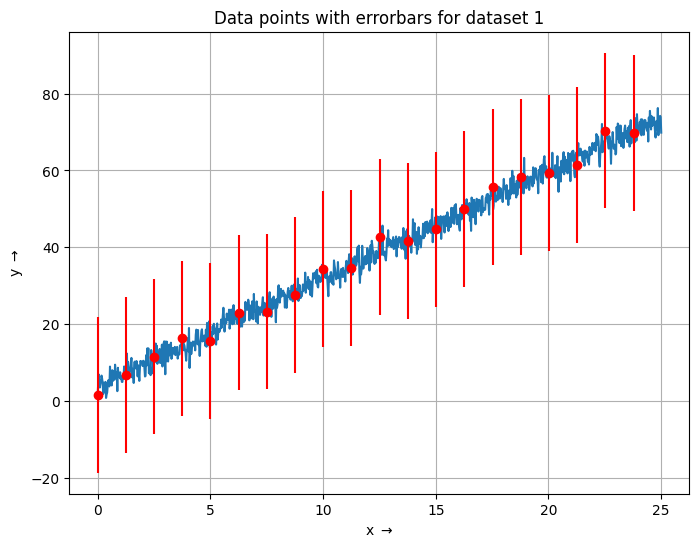

In [2]:
txtdata1 = []
name1 = "dataset1.txt" 
txtdata1 = np.loadtxt(name1, dtype = float) #Load the dataset into txtdata1
x1 = txtdata1[:, 0] #Extract x 
y1 = txtdata1[:, 1] #Extract y
plt.figure(figsize = (8,6))
plt.plot(x1, y1, label = 'y') #Plot y vs x
plt.errorbar(x1[::50], y1[::50], np.std(y1), fmt='ro') #Errorbars
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.title("Data points with errorbars for dataset 1")
plt.grid(True)
plt.show()

In [3]:
M = np.column_stack([x1, np.ones(len(x1))]) #Get matrix M
(m, c), _, _, _ = np.linalg.lstsq(M, y1, rcond = None) #Get slope and Intercept
print(f"The line is estimated to be y = {m}x + {c}") #Print equation of line
%timeit np.linalg.lstsq(M, y1, rcond = None)

The line is estimated to be y = 2.791124245414918x + 3.848800101430743
55.3 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
def line(x, m, c): #Function used to define line
    return m*np.array(x) + c

Text(0.5, 1.0, 'Regression line with data points using least squares')

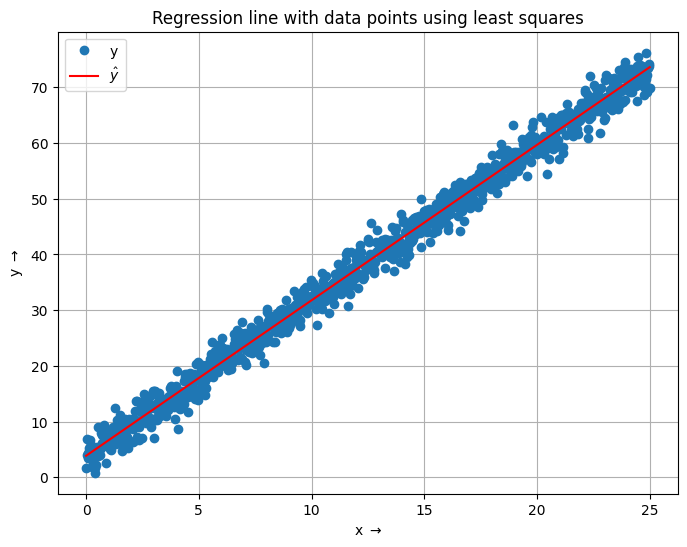

In [6]:
#Plot regression line using lstsq method
plt.figure(figsize = (8,6))
plt.plot(x1,y1, 'o', label = 'y')
plt.plot(x1, line(x1, m, c),'r', label = r'$\hat{y}$')
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.grid(True)
plt.legend()
plt.title("Regression line with data points using least squares")

In [7]:
(m1, c1), pcov = curve_fit(line, x1, y1) #Use curve_fit
print(f"The line is estimated to be y = {m1}x + {c1}") #Print line
%timeit curve_fit(line, x1, y1)

The line is estimated to be y = 2.7911242448201588x + 3.848800111263445
459 µs ± 8.17 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Text(0.5, 1.0, 'Regression line with data points using curve fit')

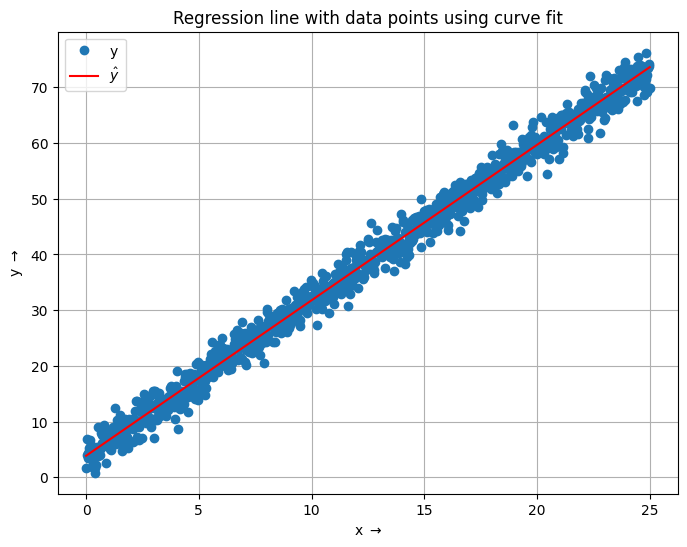

In [8]:
#Plot regression line using curve_fit method
plt.figure(figsize = (8,6))
plt.plot(x1,y1, 'o', label = 'y')
plt.plot(x1, line(x1, m1, c1),'r', label = r'$\hat{y}$')
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.grid(True)
plt.legend()
plt.title("Regression line with data points using curve fit")

Text(0.5, 1.0, 'Regression line with data points using curve fit')

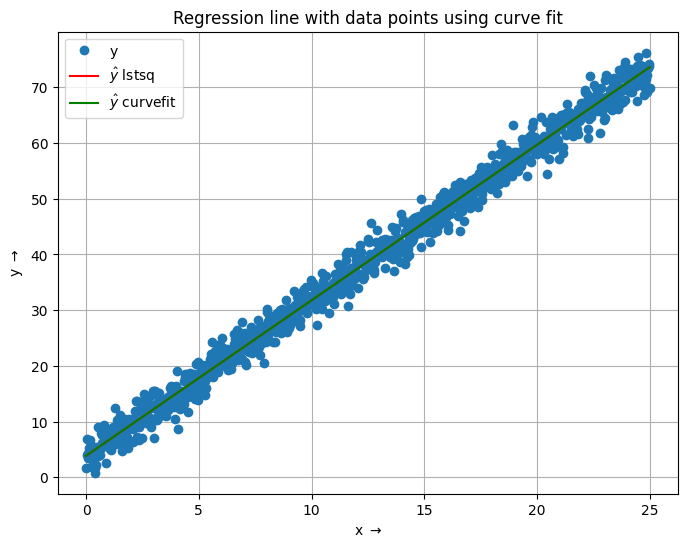

In [9]:
#Plot regression line using lstsq and curve_fit method
plt.figure(figsize = (8,6))
plt.plot(x1,y1, 'o', label = 'y')
plt.plot(x1, line(x1, m, c),'r', label = r'$\hat{y}$ lstsq')
plt.plot(x1, line(x1, m1, c1),'g', label = r'$\hat{y}$ curvefit')
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.grid(True)
plt.legend()
plt.title("Regression line with data points using curve fit")

### Observation
It is observed that the regression line obtained from lstsq and curve_fit coincide almost perfectly. There is very slight error from 5th decimal. This is negligible for almost all practical considerations.

With regard to time, the lstsq method takes 88.3 $\mu$s while the curve_fit takes 473$\mu$s. Thus, the lstsq is faster than curve_fit and thus, best suited for linear regression. 

Thus, I would prefer using lstsq over curve_fit for linear data

# Data Set 2

### Fourier Series Coefficients of the Square Pulse
The Fourier Series coefficients of the square pulse of amplitude 5 (the idea for this comes from the peak of the sine wave which is around 5 on an average) are as following - 
<center style = "font-size:16px">
    $a_k$ = 0 $\forall$ k <br>
    $b_k$ = 0 $\forall$ even k <br>
    $b_k$ = $\frac{20}{\pi k}$ $\forall$ odd k
</center>
where the signal x(t) is written as
<center style = "font-size : 16px">
    $x(t)$ = $\sum$ $a_k$cos(k$w_o$t) + $\sum$ $b_k$sin(k$w_o$t)
</center>

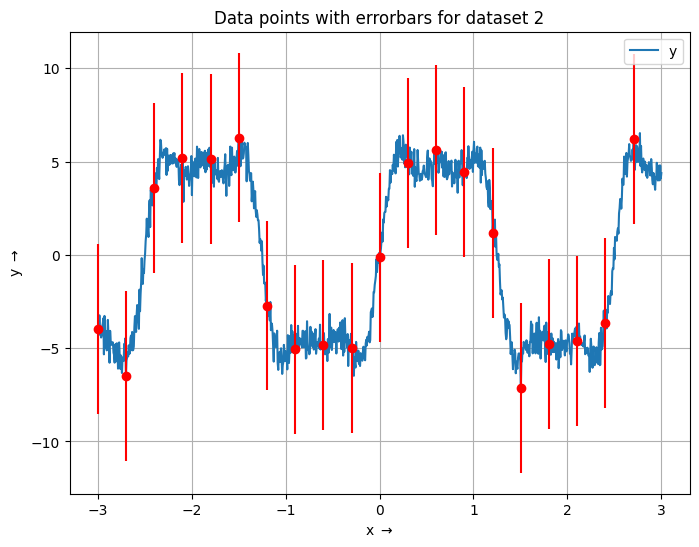

In [10]:
txtdata2 = [] 
name2 = "dataset2.txt"
txtdata2 = np.loadtxt(name2, dtype = float) #Load dataset 2
x2 = txtdata2[:, 0] #Extract x
y2 = txtdata2[:, 1] #Extract y
plt.figure(figsize = (8,6))
plt.plot(x2, y2, label = 'y') #Plot y vs x
plt.errorbar(x2[::50], y2[::50], np.std(y2), fmt='ro') #Plot errorbars
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.title("Data points with errorbars for dataset 2")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
def squarepulse(x, n, wo): #Define probable function which appears to be a square pulse
    s = np.zeros(len(x))
    m = int(n)
    for i in range (1, m, 2):
        s = s + (20/np.pi)* (1/i) *np.sin(i*wo*x) #Reasoning is given in markdown box (Fourier Series)
    return s

In [12]:
def plotdata2(n, wo): #Function to interactively guess the data using ipywidgets
    yobt = squarepulse(x2, n, wo)
    plt.plot(x2, y2, 'b')
    plt.plot(x2, yobt, 'r')

In [13]:
wdg.interact(plotdata2, n = wdg.IntSlider(min= 1, max = 99, step = 2), wo = wdg.FloatSlider(min = 0.01, max = 100.00, step = 0.01))

interactive(children=(IntSlider(value=1, description='n', max=99, min=1, step=2), FloatSlider(value=0.01, desc…

<function __main__.plotdata2(n, wo)>

In [15]:
(N, wo), pconv = curve_fit(squarepulse, x2, y2, p0=(7,2.5)) #Estimate using curve_fit and initial guess

In [16]:
print(f"Number of sine waves is {(N-1)/2} with fundamental frequency {wo} rad/s. ALl are odd harmonics beginning from 1st to {N-2}th harmonic") #Print out what was asked

Number of sine waves is 3.0 with fundamental frequency 2.511958571583236 rad/s. ALl are odd harmonics beginning from 1st to 5.0th harmonic


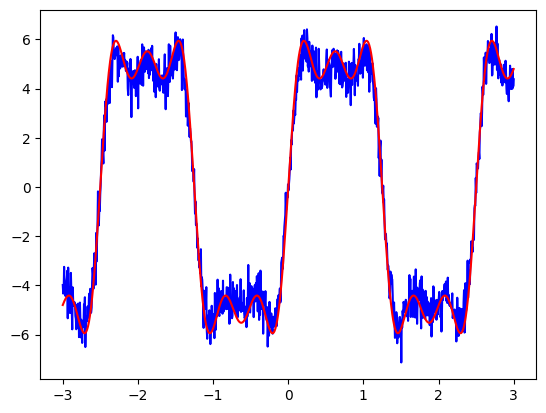

In [17]:
plotdata2(N,wo)

### Choosing initial points for curve_fit (p0)
By using widgets, I was clearly able to manipulate the plots dynamically and was checking for a good fit. 

By visual inspection, I was able to conclude that n = 9 and w = 2.51 satisfy the curve nicely. However, I may be wrong since this is subject to visual inspection. On subjecting p0 to curve_fit, I get the conditions as n = 7 and wo as 2.52

n = 7 implies that the 1st, 3rd and 5th harmonic of sine wave of fundamental frequency wo = 2.52 rad/s has been used.

### Explanation for choosing this sort of approach
Since the given waveform appears to be square, I computed the fourier coefficients which are written above. Now my task was reduced to just figuring out the frequency and number of waves. To find the initial guess, I used the widgets. Also intuitively, the time period is roughly 2.5 which implies frequency w = $\frac{2\pi}{T}$ is roughly 2.5. Thus my initial guess. 

### Regarding Curve_fit
Curve_fit fails to provide accurate results for waveforms that increase and decrease repeatedly. For example, as seen in the class, curve_fit fails on the simple sine wave. Thus, in my opinion, curve_fit is a bad choice without an initial guess. A suitable initial guess, might help in convergence.

In [18]:
def pulse(x, A, wo): #Define probable function which appears to be a square pulse
    s = np.zeros(len(x))
    for i in range (1, 10, 2):
        s = s + (4/np.pi)* (A/i) *np.sin(i*wo*x) #Reasoning is given in markdown box (Fourier Series)
    return s

In [19]:
def plotdata2b(A, wo): #Function to interactively guess the data using ipywidgets
    yobt = pulse(x2, A, wo)
    plt.plot(x2, y2, 'b')
    plt.plot(x2, yobt, 'r')

Amplitude of the first harmonic is 4.550872744102048 and fundamental frequency is 2.511074106381119


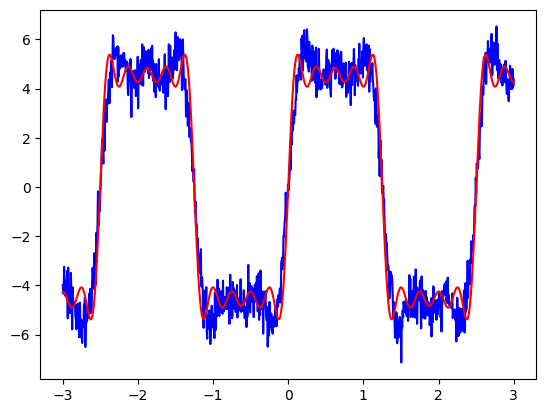

In [20]:
(A, wo), _ = curve_fit(pulse, x2, y2, p0 = (5, 2.51))
print(f"Amplitude of the first harmonic is {A} and fundamental frequency is {wo}")
plotdata2b(A, wo)

### Alternate Approach (Determine Amplitude)
The above three cells can be used to determine the amplitude and the frequency assuming the number of sine waves is known to be 5. That is 1st, 3rd, 5th, 7th and 9th harmonic. This approach can be used when we are certain of the number of waves involved. However, the fourier coefficient approach is still assumed, that is amplitude of successive terms gets attenuated by a factor of (n/n-2)

# Data Set 3

### Planck's Law
Planck's Law for a Black Body Emission is given by
<center style="font-size:20px">
$B(\nu, T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{\frac{h\nu}{k_BT}}-1}$
</center>

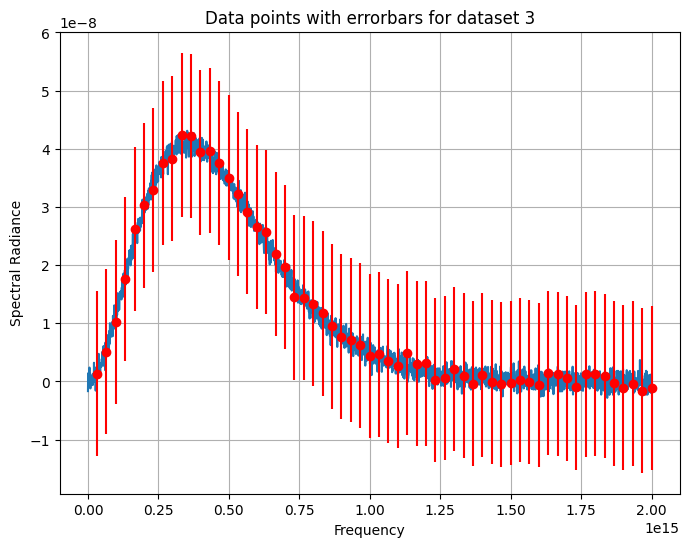

In [21]:
txtdata3 = []
name = "dataset3.txt"
txtdata3 = np.loadtxt(name, dtype = float) #Load dataset 3
x3 = txtdata3[:, 0] #Extract x
y3 = txtdata3[:, 1] #Extract y
plt.figure(figsize = (8,6))
plt.plot(x3, y3, label = 'y') #Plot y vs x 
plt.errorbar(x3[::50], y3[::50], np.std(y3), fmt='ro') #Errorbars
plt.xlabel(r"Frequency")
plt.ylabel(r"Spectral Radiance")
plt.title("Data points with errorbars for dataset 3")
plt.grid(True)
plt.show()

In [22]:
c = 3e8
k = 1.38e-23
#Defined c and k which are constants of the equation

In [23]:
#Defined planks equation
def plank(freq, h, T):
    return ((2*h*freq**3)/(c**2))*(1/(np.exp(h*freq/(k*T))-1))

In [24]:
(h, T), pconv = curve_fit(plank, x3, y3, p0 = (6.6e-34, 6000))
#Fit curve using a suitable guess (h is known to us) estimate T roughly to be 6000K (Reasoning given below)

In [25]:
print("Estimated plank's constant is "+str(h))
print("Estimated Temperature is "+str(T)) #Print data output

Estimated plank's constant is 6.64322975646684e-34
Estimated Temperature is 6011.361520193709


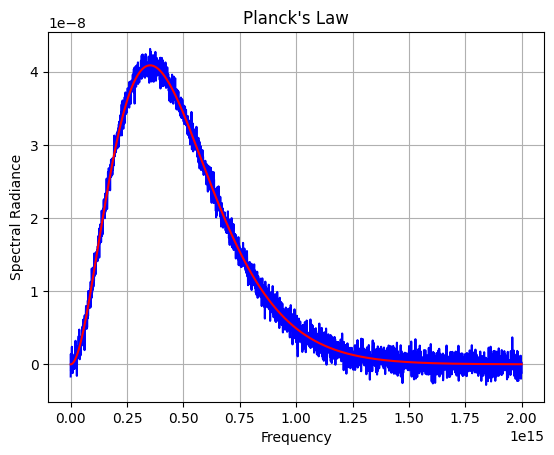

In [26]:
y3g = plank(x3, h, T) #Print data and graph 
plt.plot(x3, y3, 'b')
plt.plot(x3, y3g, 'r')
plt.ylabel('Spectral Radiance')
plt.xlabel('Frequency')
plt.title("Planck's Law")
plt.grid(True)
plt.show()

### Explanation for choosing p0
Since the value of Planck's constant is known to every science student which is h = 6.63 x $10^{-34}$ J-s, I expect an ouput that is close to 6.63 x $10^{-34}$ say 6.6 x $10^{-34}$ and thus, I chose it.

For the temperature, I approximately consider f = 1 x $10^{15}$ Hz, vary T such that the data point (y) corresponding to f is around that. That gave me around 6070 K, thus I expect around 6000K to be the temperature to be measured.

The initial guess is very important for curve_fit as without a near correct guess, the curve_fit algorithm may fail to converge and give incorrect results.

# Data Set 4

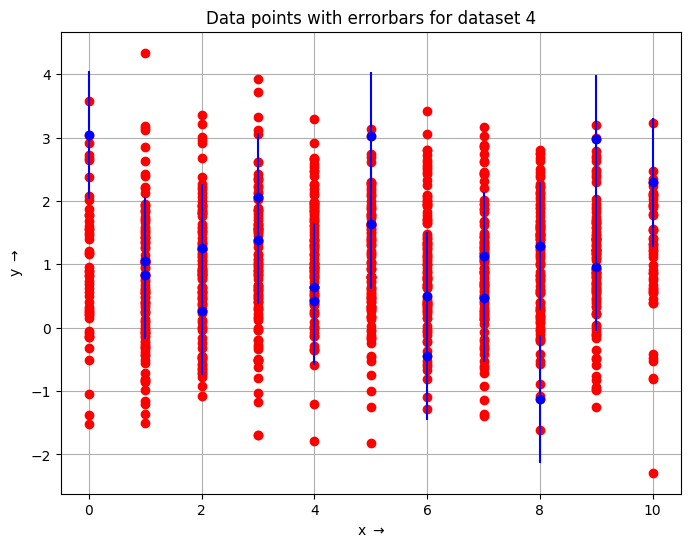

In [27]:
txtdata4 = []
name4 = "dataset4.txt"
txtdata4 = np.loadtxt(name4, dtype = float) # Load Dataset 4
x4 = txtdata4[:, 0] #Extract x
y4 = txtdata4[:, 1] #Extract y
plt.figure(figsize = (8,6))
plt.plot(x4, y4, 'ro', label = 'y') #Plot x and y
plt.errorbar(x4[::50], y4[::50], np.std(y4), fmt='bo') #Plot errorbars
plt.xlabel(r"x $\rightarrow$")
plt.ylabel(r"y $\rightarrow$")
plt.title("Data points with errorbars for dataset 4")
plt.grid(True)
plt.show()

## Approach 1

### Since the noise is Gaussian, the probability of the actual value being the mean is maximum. 

In [28]:
x4A1 = []
y4A1 = []
x4A1.append(0)
y4A1.append(np.mean(y4[:50]))
for i in range(1,10):
    x4A1.append(i)
    y4A1.append(np.mean(y4[100*i-50:100*i+50]))
x4A1.append(10)
y4A1.append(np.mean(y4[-50:]))

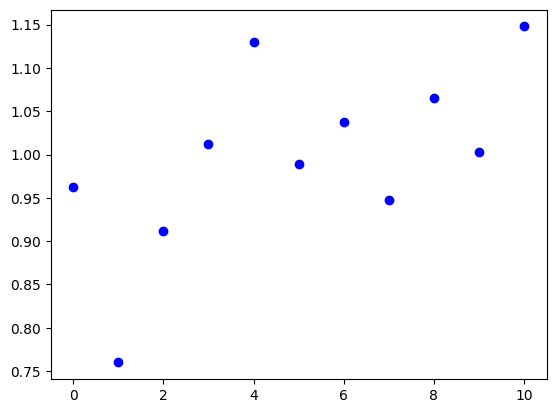

In [29]:
plt.plot(x4A1, y4A1, 'bo')

The line is y = 0.01941221713633212x +0.8999624797725327 


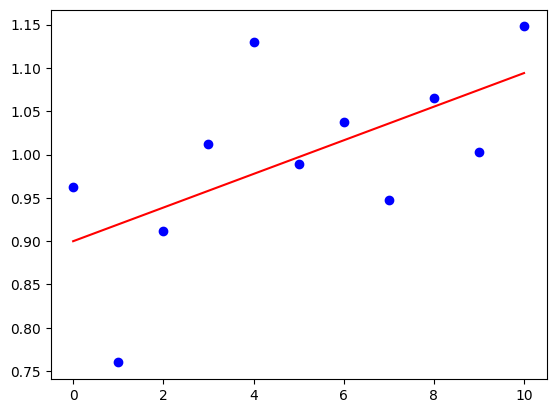

In [30]:
(M1, C1), pconv = curve_fit(line, x4A1, y4A1)
plt.plot(x4A1, y4A1, 'bo')
print(f"The line is y = {M1}x +{C1} ")
plt.plot(x4A1, line(x4A1, M1, C1), 'r')

## Approach 2

Since the endpoints x = 0 and x = 10 both have 50 points and middle points from x = 1 to x = 9 all have 100 points it seems as though the region between each x and x+1 has been divided into 100 points and mapped back to x or x+1 depending on whether it is greater than x+0.5. This is a popular scheme of mapping known as **Quantisation** used in Analog-to-Digital Converters.

The line is y = 0.021055670353005818x + 0.8860474622838546


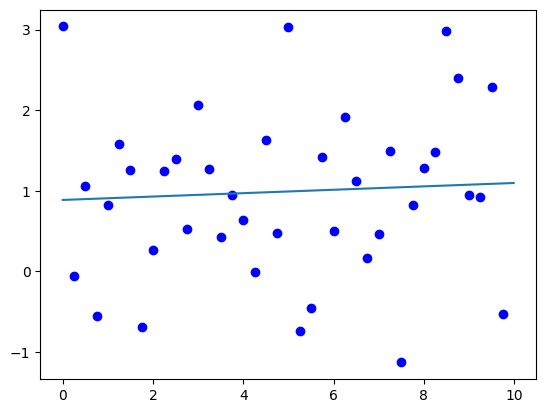

In [31]:
x4A2 = np.arange(0,10, 0.01)
(M2, C2), pconv = curve_fit(line, x4A2, y4)
print(f"The line is y = {M2}x + {C2}")
plt.plot(x4A2[::25], y4[::25], 'bo')
plt.plot(x4A2, line(x4A2, M2, C2))

### General Comments :
It appears that the data is centered around y = 1 with some spread from y=1 at each x. This is said because the y dependence on x is very small, that is the slope (m) is around 0.02 on an average.

It is interesting to note that both approaches lead eventually to roughly the same answer.

The noise is inherently Gaussian as the probability of finding y farther away from mean decreases exponentially.